In [1]:
# Import the modules
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



---

## Split the Data into Training and Testing Sets

### Step 1: Read the `loan_approval_dataset.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('loan_approval_dataset.csv')
)

# Review the DataFrame
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Define the new column names without spaces
new_columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
               'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
               'residential_assets_value', 'commercial_assets_value',
               'luxury_assets_value', 'bank_asset_value', 'loan_status']

# Rename the columns
df.columns = new_columns




In [4]:
df['education']=np.where(df['education'] == ' Graduate', 1, 0)
df['loan_status']=np.where(df['loan_status'] == ' Approved', 1, 0)
df['self_employed']=np.where(df['self_employed'] == ' Yes', 1, 0)


df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [5]:
#df_approval = df.loc[df['loan_status']==1]

df_corr=df.corr()
df_corr['loan_status']

loan_id                     0.017685
no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

In [6]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

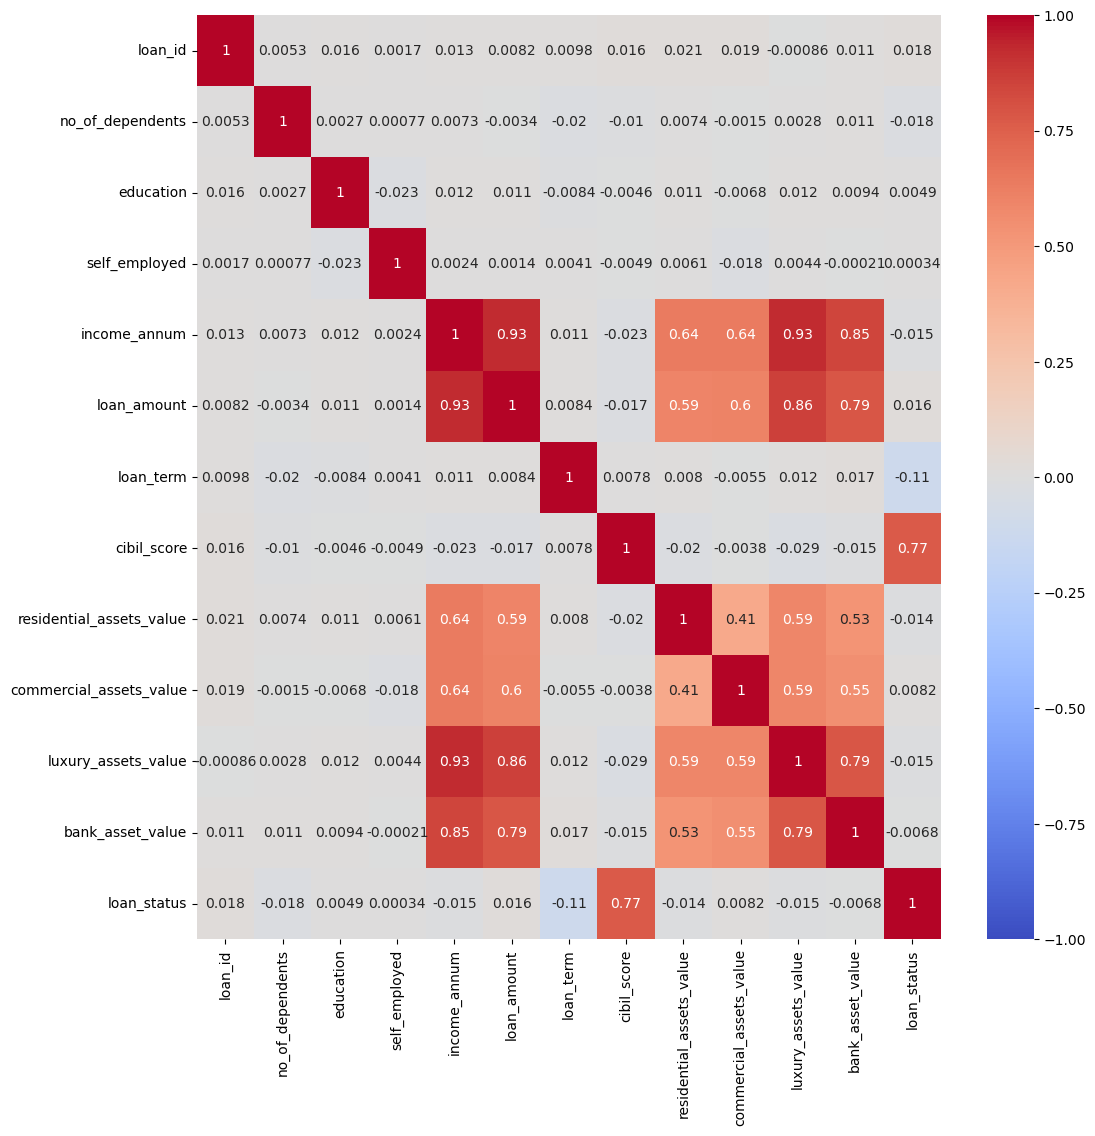

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, vmin=-1, cmap='coolwarm', annot=True)

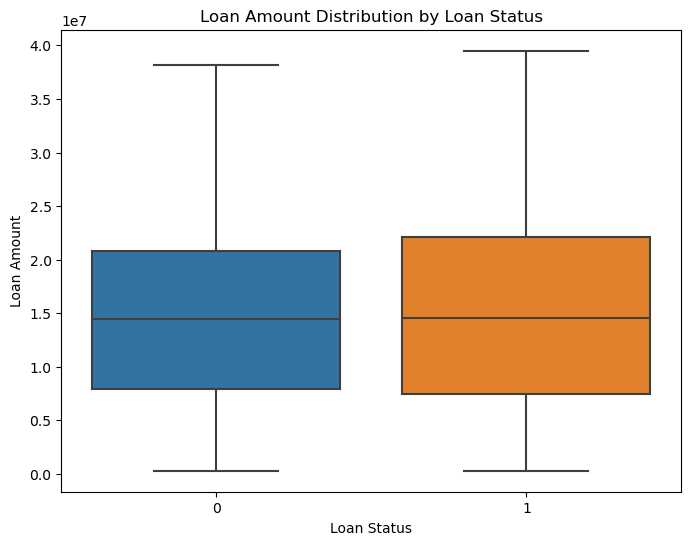

In [8]:
# Visualizations 

# Boxplot for distribution of loan amounts based on loan status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

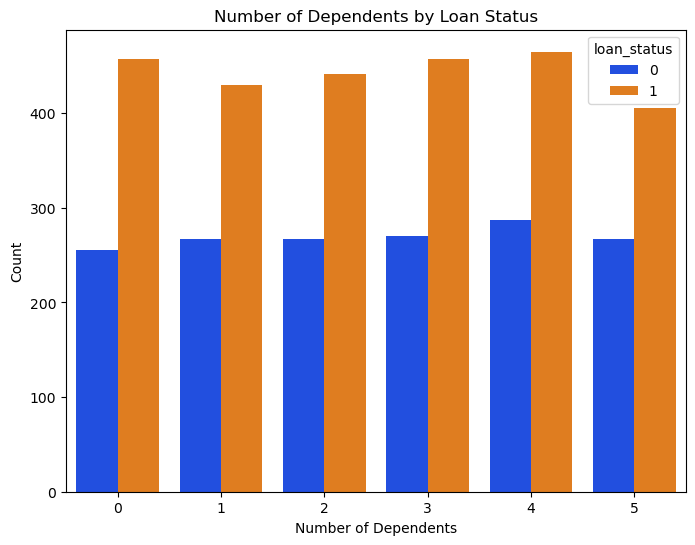

In [9]:
# Countplot for number of dependents based on loan status
plt.figure(figsize=(8, 6))
sns.set_palette("bright")
sns.countplot(x='no_of_dependents', hue='loan_status', data=df)
plt.title('Number of Dependents by Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

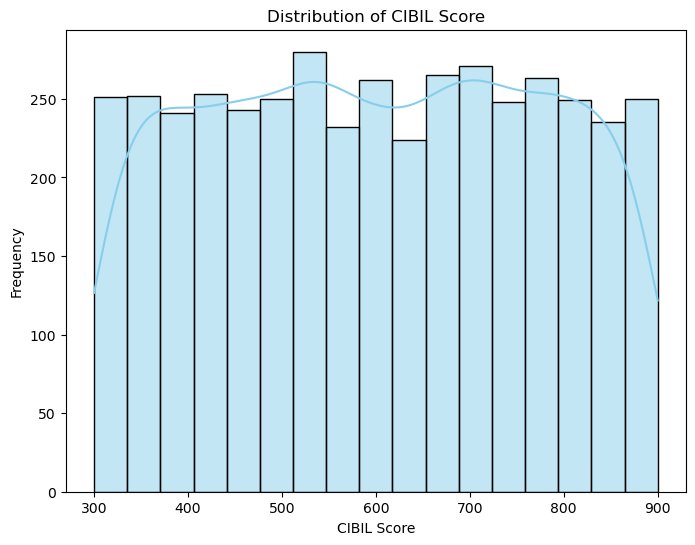

In [10]:
# Distribution plot for CIBIL score
plt.figure(figsize=(8, 6))
sns.set_palette("bright")
sns.histplot(df['cibil_score'], kde=True, color='skyblue')
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

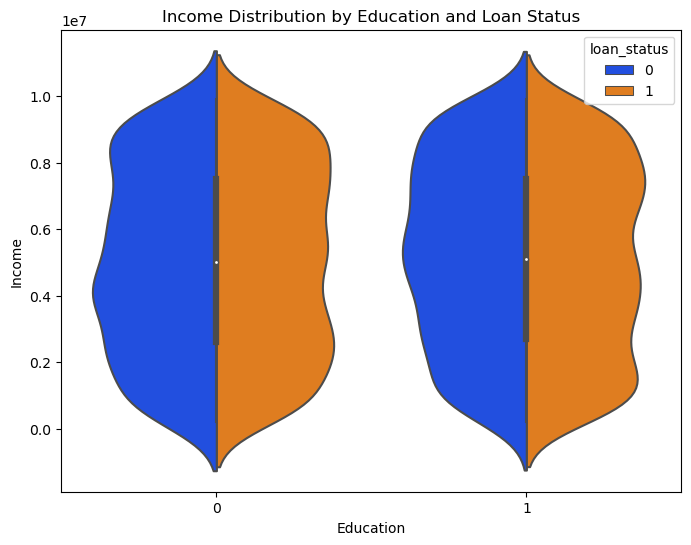

In [11]:
# Violin plot for income distribution based on education
plt.figure(figsize=(8, 6))
sns.set_palette("bright")
sns.violinplot(x='education', y='income_annum', hue='loan_status', data=df, split=True)
plt.title('Income Distribution by Education and Loan Status')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

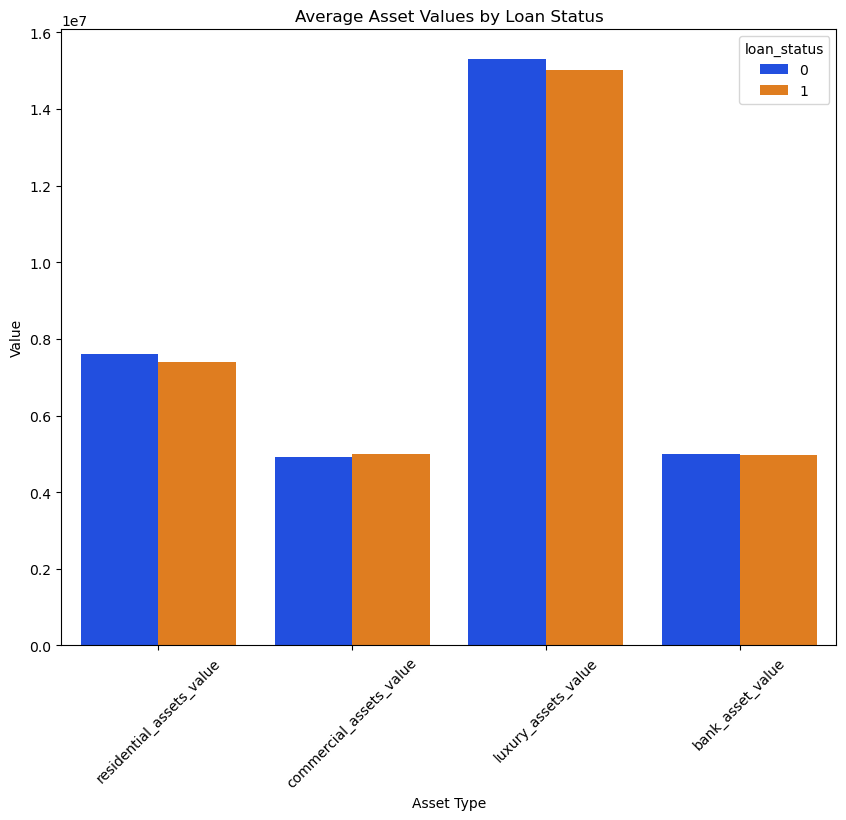

In [12]:
# Bar plot for average asset values based on loan status
asset_columns = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
mean_assets = df.groupby('loan_status')[asset_columns].mean().reset_index()
mean_assets_melted = mean_assets.melt(id_vars='loan_status', var_name='Asset Type', value_name='Value')

plt.figure(figsize=(10, 8))
sns.set_palette("bright")
sns.barplot(x='Asset Type', y='Value', hue='loan_status', data=mean_assets_melted)
plt.title('Average Asset Values by Loan Status')
plt.xlabel('Asset Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

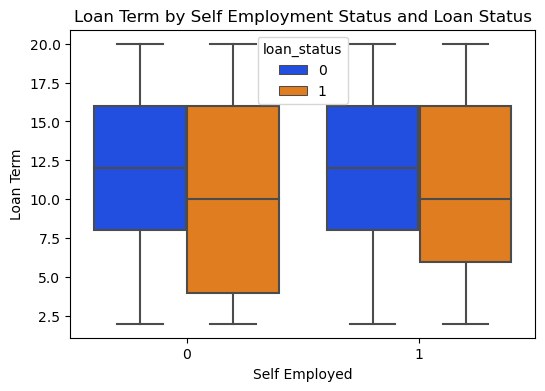

In [13]:
# Scatter plot for income vs loan amount colored by loan status

import plotly.express as px
fig = px.scatter(df, x='income_annum', y='loan_amount', color='loan_status', title='Income vs Loan Amount by Loan Status')
fig.show()

# Box plot for loan term based on self-employment status
plt.figure(figsize=(6, 4))
sns.boxplot(x='self_employed', y='loan_term', hue='loan_status', data=df)
plt.title('Loan Term by Self Employment Status and Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Loan Term')
plt.show()

#Explanation :Income is  directly proportional to Loan amount ,As income increases loan amoount increases

In [14]:
#Explanation : The lower quartile  for Self employed is higher than for employed people (6 for Self employed and around 4 for  employed) Generally self employed people get a longer term than self employed people
# Meadian is  10 and Upper quartile  is same 
# for Self employed people a longer loan term is granted

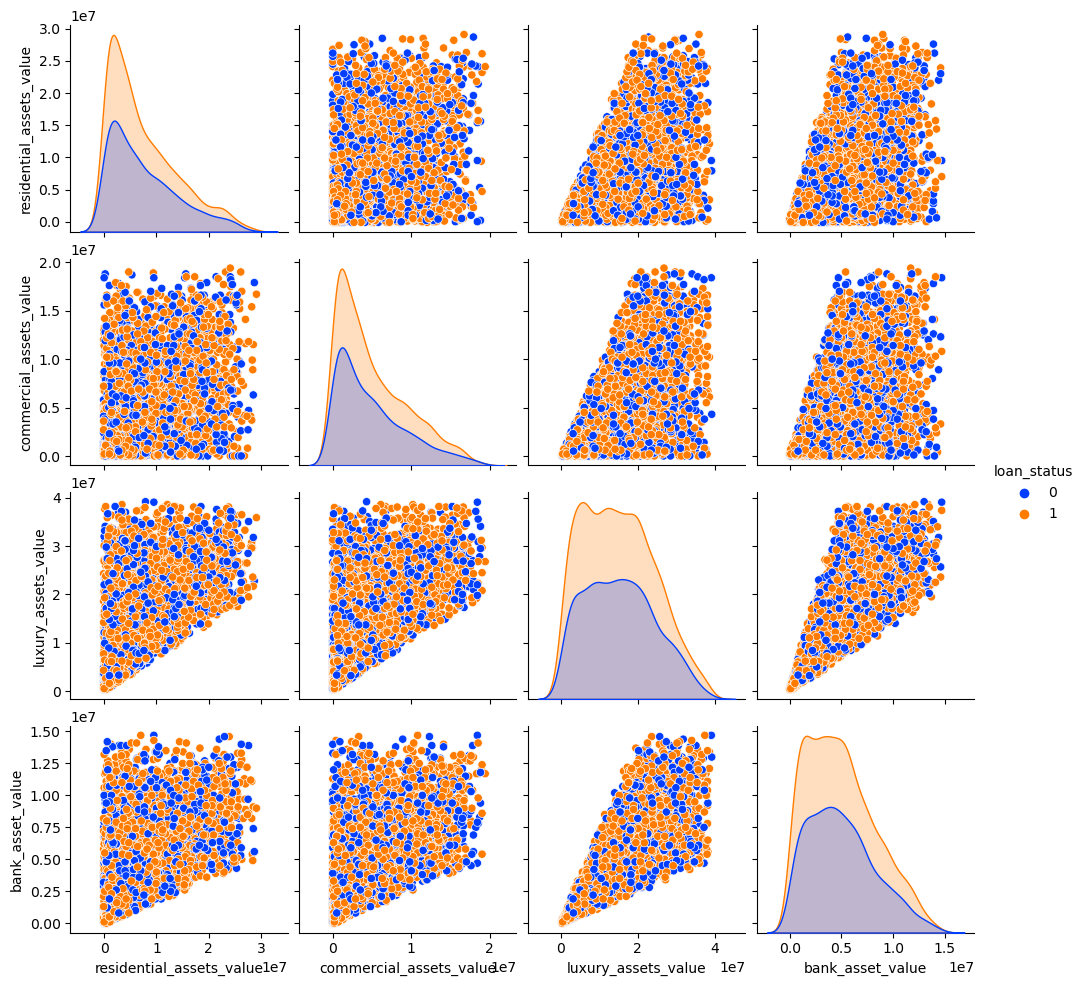

In [15]:
import warnings
warnings.filterwarnings('ignore')
# Pair plot for asset values and loan status
sns.set_palette("bright")
sns.pairplot(df, vars=asset_columns, hue='loan_status')
plt.show()

# Scatter matrix for numerical features
fig = px.scatter_matrix(df, dimensions=['income_annum', 'loan_amount', 'loan_term', 'cibil_score'], color='loan_status', title='Scatter Matrix for Numerical Features')
fig.show()

# Explanation -  There is a Direct Relationship between Luxury  Asset Value and Bank asset Value 
# Explanation -  Unapproved Loans has a lower CIBIL Score 
# Direct relationship between  income amount and Loan amount  (Column 2-Row 1)

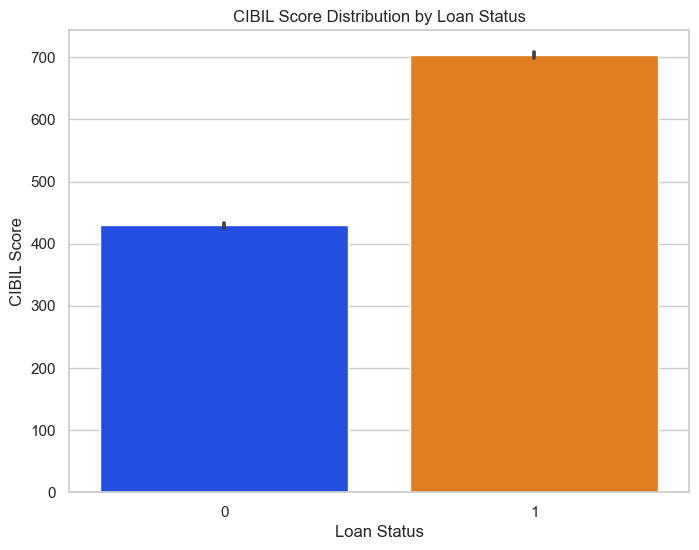

In [16]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.set_palette("bright")
sns.barplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Split the data into features (X) and target variable (y)
X = df['cibil_score'].values.reshape(-1, 1)  # Feature: CIBIL score
y = df['loan_status'].values  # Target variable: Loan status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.00217421]
Intercept: -0.6843110631562321


In [18]:
# Intepretaion 
#For every one-unit increase in the CIBIL score, the predicted probability or likelihood of a positive loan status (e.g., approved or successfully repaid) increases by approximately 0.00217421.

#In simpler terms, this means that individuals with higher CIBIL scores are more likely to have a positive loan status compared to those with lower CIBIL scores

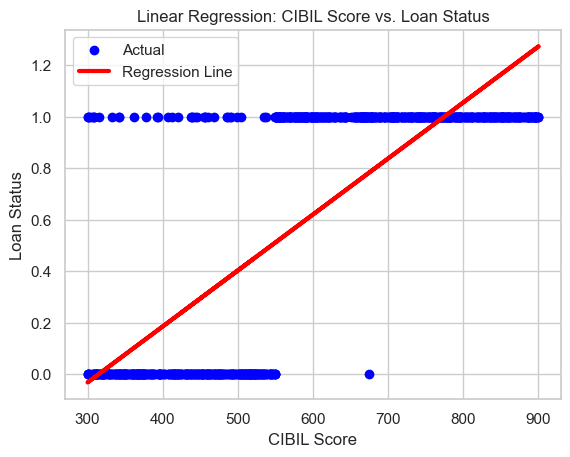

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3, label='Regression Line')

# Add labels and title
plt.title('Linear Regression: CIBIL Score vs. Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Loan Status')
plt.legend()

# Show plot
plt.show()

#Explanation :A CIBIL score is a three-digit numeric summary of an individual's credit history. It ranges from 300 to 900, with higher scores indicating better creditworthiness.

In [20]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']
# Separate the X variable, the features
X = df.drop(columns='loan_status')


In [21]:
# Review the y variable Series
y


0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int32

In [22]:
y.value_counts()

1    2656
0    1613
Name: loan_status, dtype: int64

In [23]:
# Review the X variable DataFrame
X

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [24]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Machine Learning Model

###  Logistic Regression.

In [25]:
import warnings
warnings.filterwarnings('ignore')



In [26]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [27]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test,predictions))

[[  2 406]
 [  4 656]]


In [29]:
# Generate a confusion matrix for the model
print(confusion_matrix(y_test,predictions))

[[  2 406]
 [  4 656]]


In [30]:
y_test.value_counts()

1    660
0    408
Name: loan_status, dtype: int64

### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
clf_boosting.fit(X_train, y_train)
predictions_2 = clf_boosting.predict(X_test)


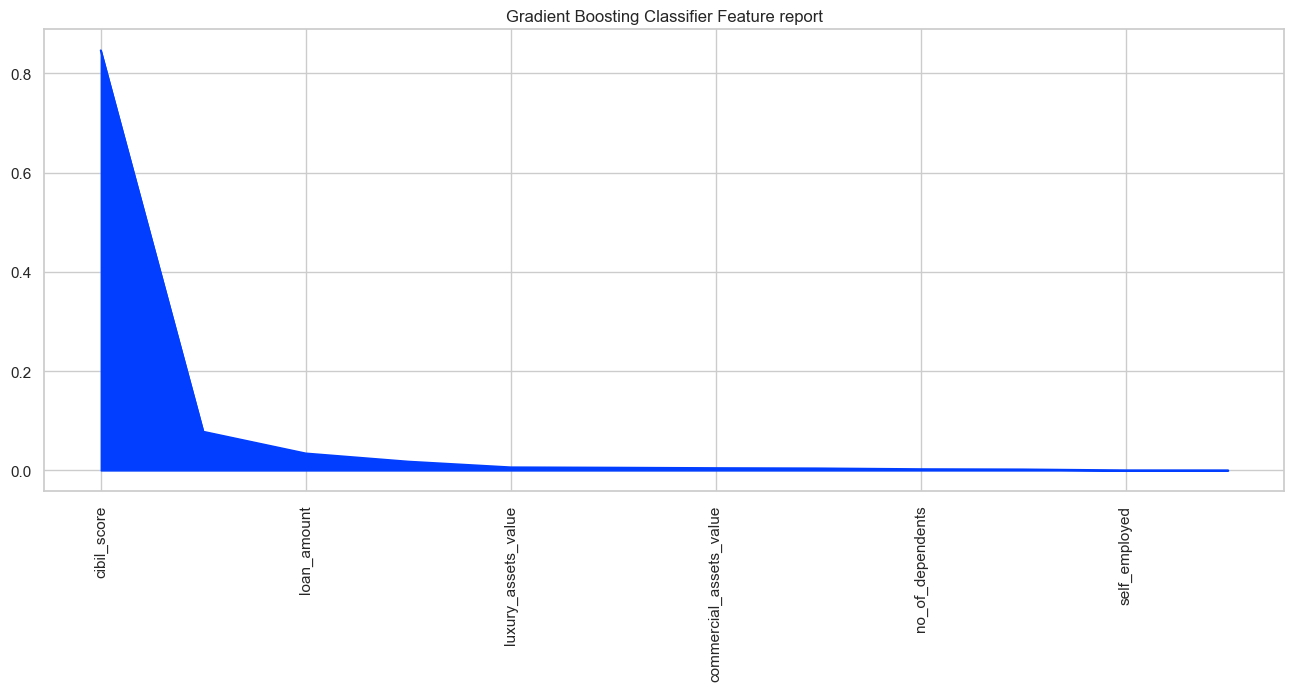

In [32]:
pd.Series(clf_boosting.feature_importances_,X_train.columns).sort_values(ascending=False).plot.area(rot=90, figsize=[16,6], title='Gradient Boosting Classifier Feature report');

In [33]:
print(confusion_matrix(y_test,predictions_2))

[[396  12]
 [ 10 650]]


In [34]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
predictions_3 = clf_dt.predict(X_test)


In [36]:
feature_importances = pd.Series(clf_dt.feature_importances_, index=X_train.columns)
# Sort the values in descending order
feature_importances = feature_importances.sort_values(ascending=False)

In [37]:
#added
colors = plt.cm.tab20.colors[:len(feature_importances)]

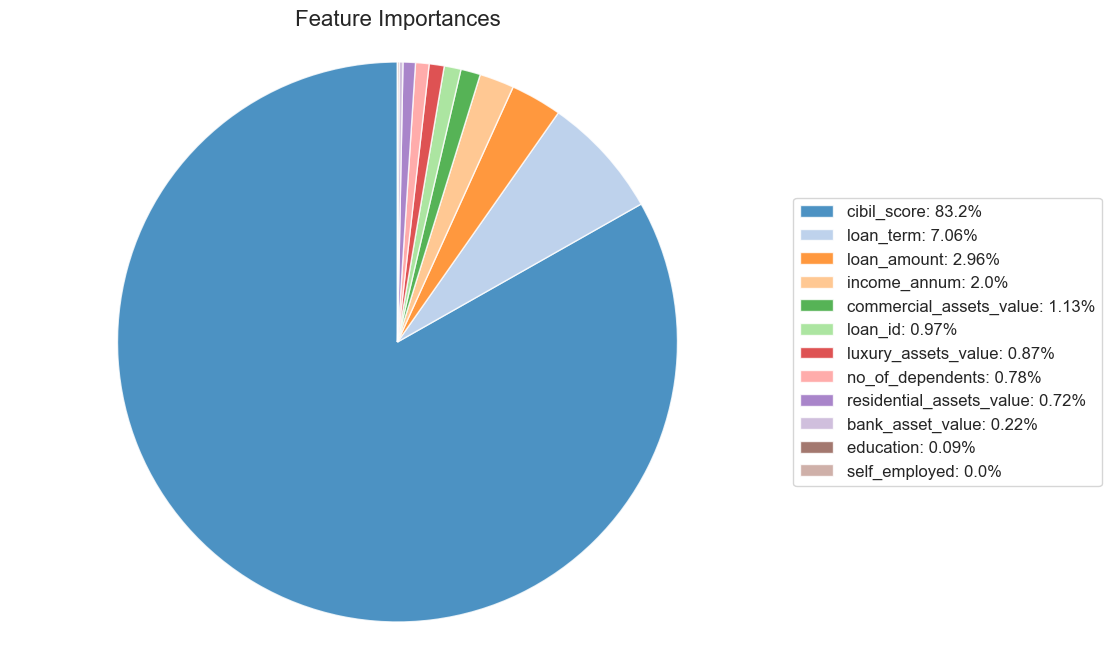

In [38]:
import matplotlib.pyplot as plt

# Extract feature importances from the classifier
feature_importances = clf_dt.feature_importances_

# Create a Series with feature importances as values and column names as index
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
feature_importances_series = feature_importances_series.sort_values(ascending=False)

# Define colors for the slices
colors = plt.cm.tab20.colors[:len(feature_importances_series)]

# Plotting a pie chart for feature importances without labels
plt.figure(figsize=[10, 8])
patches, _ = plt.pie(feature_importances_series, startangle=90, colors=colors, wedgeprops={'alpha':0.8})
plt.title('Feature Importances', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with custom labels
plt.legend(labels=feature_importances_series.index + ': ' + (feature_importances_series * 100).round(2).astype(str) + '%', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

In [39]:
print(confusion_matrix(y_test,predictions_3))

[[396  12]
 [ 12 648]]


In [40]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
predictions_4 = rf.predict(X_test)


In [42]:
print(confusion_matrix(y_test,predictions_4))

[[397  11]
 [ 11 649]]


In [43]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



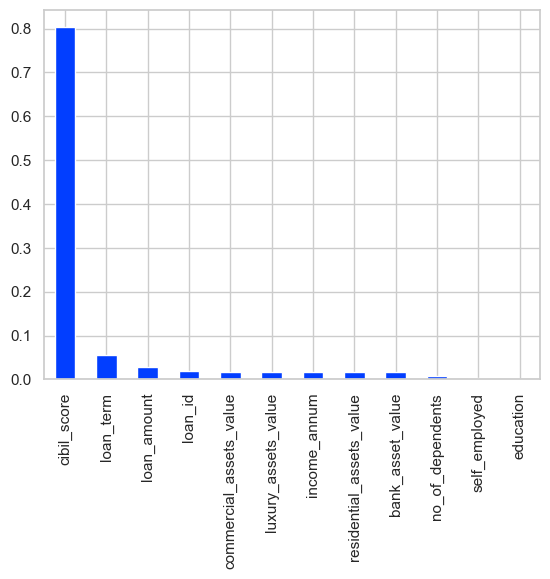

In [44]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions_nn = mlp.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, predictions_nn))
print(classification_report(y_test, predictions_nn))


[[375  33]
 [ 32 628]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       408
           1       0.95      0.95      0.95       660

    accuracy                           0.94      1068
   macro avg       0.94      0.94      0.94      1068
weighted avg       0.94      0.94      0.94      1068



In [46]:
#GridSearchCV: is a technique to systematically search over a defined grid of hyperparamete

from sklearn.model_selection import GridSearchCV

# Explanation - This import statement allows you to use the GridSearchCV class to perform hyperparameter tuning for machine learning models.
# Explanation -Tests all possible combinations of hyperparameters, ensuring the best possible model performance.
# Explanation -It fits the estimator on the training set and evaluates it on the validation set using cross-validation to find the optimal hyperparameter values

# Define the parameter grid :
#These hyperparameters are commonly tuned for random forest models, and the grid search will evaluate the model's performance with all possible combinations of these hyperparameters to find the best combination.

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier :This is a class provided by scikit-learn for constructing a Random Forest classifier,using averaging ti improve predictive accuracy
rf = RandomForestClassifier(random_state=1)

# Create a GridSearchCV object :hyperparameter tuning via an exhaustive search over a specified parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model :performs the grid search with cross-validation to find the best combination of hyperparameters for the RandomForestClassifier
grid_search.fit(X_train, y_train)

# Get the best parameters :retrieves the best parameters found during the grid search. 
best_params = grid_search.best_params_

# Train the best model: trains the best model using the best parameters found during the grid search
best_rf = RandomForestClassifier(**best_params, random_state=1)
best_rf.fit(X_train, y_train)

# Make predictions
predictions_rf_best = best_rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions_rf_best))
print(classification_report(y_test, predictions_rf_best))

print(f"Best parameters found: {best_params}")

# Explanation of  Results 
#The line "Fitting 3 folds for each of 81 candidates, totaling 243 fits" indicates that the grid search process
#evaluated 81 different combinations of hyperparameters (3 options for each of the 4 hyperparameters),
#with each combination being tested using 3-fold cross-validation.

#confusion matrix indicates that there were 397 true negatives, 646 true positives, 11 false positives, and 14 false negatives

# Best Parameters: Finally, the line "Best parameters found:shows the hyperparameters that resulted in the best performance during the grid search.
# These parameters represent the optimal configuration for the RandomForestClassifier model based on the evaluation metric used
# Overall the Model performed well.
# In total, 243 different models were trained and evaluated (3 folds * 81 candidates)

#Precision for class 0: 0.97=Of all the instances predicted as class 0, 97% were correct.
#Recall for class 0: 0.97=Of all the actual class 0 instances, 97% were correctly identified.
#F1-Score for class 0: 0.97=The harmonic mean of precision and recall for class 0.
#Precision for class 1: 0.98=Of all the instances predicted as class 1, 98% were correct.
#Recall for class 1: 0.98=Of all the actual class 1 instances, 98% were correctly identified.
#F1-Score for class 1: 0.98=The harmonic mean of precision and recall for class 1.
#Accuracy: 0.98=The overall accuracy of the model, meaning 98% of the total predictions were correct.
#Macro Average:Averages the precision, recall, and F1-score for both classes without considering class imbalance
# Weighted Average:=Averages the precision, recall, and F1-score for both classes considering class imbalance.

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[[397  11]
 [ 14 646]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.98      0.98       660

    accuracy                           0.98      1068
   macro avg       0.97      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [47]:
X

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


---